<a href="https://colab.research.google.com/github/mattsmiths/biol470/blob/main/week2/BIOL470_modeled_neurons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BIOL-470 (Week-2) Intro to modeling neuron activity!



1.   **Hi everyone! Welcome to your 2nd week activity: using Google Colab and Python to model neuronal activity and depolarization**

2.   You can use the activity outline in Canvas to get more detailed instructions and prompts on the activity

2.   Have fun and good luck!



# First we will load all the Python libraries for our code

In [4]:
#@title Click here to load libraries

###############################################
## Import packages and specify some settings ##
###############################################
# Import packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#@title This code will add some nice formatting to the plots we generate

%matplotlib inline
sns.set(context='paper',style='white',font_scale=1.5,rc={"lines.linewidth":2.5})
sns.set_palette('muted')

# Now we will start to design a stimulus for our neuron

## Creating a consistent stimulus input

The units of time are in milli-seconds
The units of the current are in milli-amps

In [37]:
input_time = 600 # @param {type:"string"}
input_current = 4 # @param {type:"string"}
# Time-constant input current


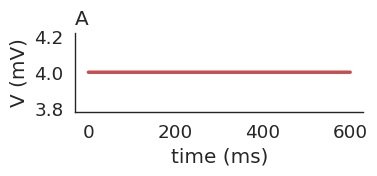

In [69]:
#@title Generate the plot

dt=.1
time=np.arange(0,int(input_time),dt)

plt.subplots(1,1,figsize=(4,2))
plt.subplot(1,1,1)
#plt.plot([0,0],[0,int(input_current)],color='r')
plt.plot(time,int(input_current)+0*time,color='r')
plt.ylabel('I$_x$ (mV)')
plt.title('A',loc='left')
sns.despine()

plt.xlabel('time (ms)')
plt.ylabel('V (mV)')
sns.despine()
plt.tight_layout()

plt.savefig('fig1A.pdf')

In [50]:
# Neuron parameters
equilibrium_potential = -72 # @param {type:"string"}
membrane_time_constant = 15 # @param {type:"string"}
initial_potential = -70 # @param {type:"string"} #VO


The equation is implemented below

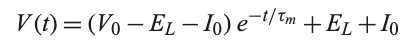

In [51]:
###############################################
          # Leaky integrator #
###############################################

# Compute Voltage
V=(initial_potential-equilibrium_potential-input_current)*np.exp(-time/membrane_time_constant)+equilibrium_potential+input_current


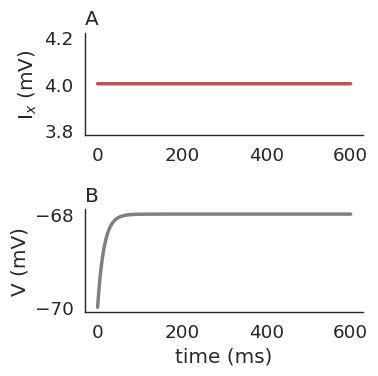

In [53]:
#@title Make figure
plt.subplots(2,1,figsize=(4,4))

plt.subplot(2,1,1)
plt.plot(time,input_current+0*time,color='r')
plt.ylabel('I$_x$ (mV)')
plt.title('A',loc='left')
sns.despine()


plt.subplot(2,1,2)
plt.plot(time,V,color='gray')
plt.xlabel('time (ms)')
plt.ylabel('V (mV)')
plt.title('B',loc='left')
sns.despine()
plt.tight_layout()

plt.savefig('fig1B.pdf')

In [57]:
#@title Now create a simulation with time-varying input

# Discretized time

input_time = 600 # @param {type:"string"}
input_current = 4 # @param {type:"string"}
# Time-constant input current
dt=.1
time=np.arange(0,input_time,dt)

equilibrium_potential = -72 # @param {type:"string"}
membrane_time_constant = 15 # @param {type:"string"}
initial_potential = -70 # @param {type:"string"} #VO

spike_start = 100 # @param {type:"string"} #VO
spike_end = 400 # @param {type:"string"} #VO

# Time-varying input current
Ix=np.zeros_like(time)
Ix[(time>=spike_start) & (time<=spike_end)]=input_current

In [ ]:
#@title Make figure
plt.subplots(1,1,figsize=(4, 2))

plt.subplot(1,1,1)
plt.plot(time,Ix,color='r')
#plt.xlabel('time (ms)')
plt.subplot(1,1,1)
plt.ylabel('I$_x$ (mV)')
#plt.title('C',loc='left')
sns.despine()
#plt.title('D',loc='left')

plt.tight_layout()
plt.savefig('fig2a.pdf')

In [125]:
# Define a convolution kernel over a shorter time duration
s=np.arange(-5*membrane_time_constant,5*membrane_time_constant,dt)
k=(1/membrane_time_constant)*np.exp(-s/membrane_time_constant)*(s>=0)

# Define V by convolution
#V=(initial_potential-equilibrium_potential)
#*np.exp(-time/membrane_time_constant)+equilibrium_potential+
#np.convolve(Ix,k,mode='same')*dt

V=(initial_potential-equilibrium_potential)*np.exp(-time/membrane_time_constant)+equilibrium_potential+np.convolve(Ix,k,mode='same')*dt


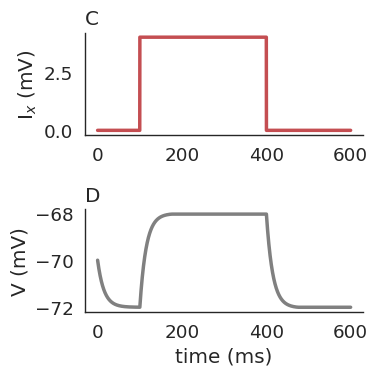

In [66]:
#@title Make figure
plt.subplots(2,1,figsize=(4, 4))

plt.subplot(2,1,1)
plt.plot(time,Ix,color='r')
#plt.xlabel('time (ms)')
plt.ylabel('I$_x$ (mV)')
plt.title('C',loc='left')
sns.despine()


plt.subplot(2,1,2)
plt.plot(time,V,color='gray')
plt.xlabel('time (ms)')
plt.ylabel('V (mV)')
sns.despine()
plt.title('D',loc='left')

plt.tight_layout()
plt.savefig('fig1.pdf')

In [121]:
input_time = 1000 # @param {type:"string"}
input_current = 5 # @param {type:"string"}
input_current2 = 18 # @param {type:"string"}
# Time-constant input current
dt=.1
time=np.arange(0,input_time,dt)

equilibrium_potential = -72 # @param {type:"string"}
membrane_time_constant = 15 # @param {type:"string"}
initial_potential = -70 # @param {type:"string"} #VO

spike_start = 200 # @param {type:"string"} #VO
spike_end = 400 # @param {type:"string"} #VO


spike_start2 = 600 # @param {type:"string"} #VO
spike_end2 = 800 # @param {type:"string"} #VO

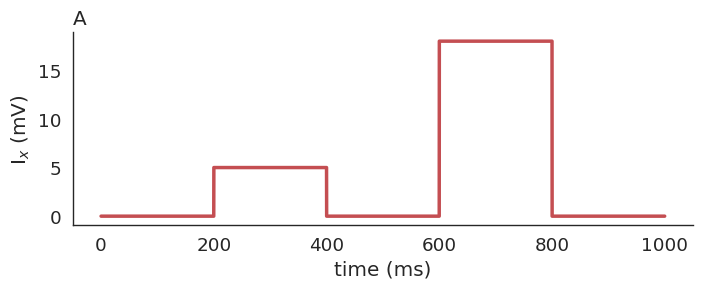

In [135]:
voltage_spike_max=5 # @param {type:"string"}
voltage_reset=-75 # @param {type:"string"}
voltage_threshold=-55 # @param {type:"string"}
exp_coEfficient=2 # @param {type:"string"}


# Discretized time
T=1000
dt=.1
time=np.arange(0,T,dt)

# Applied current
Ix=np.zeros_like(time)
Ix[(time>=spike_start) & (time<=spike_end)]=5
Ix[(time>=spike_start2) & (time<=spike_end2)]=18
plt.subplots(1,1,figsize=(8, 2.5))
plt.subplot(1,1,1)
plt.plot(time,Ix,color='r')
plt.xlabel('time (ms)')
plt.ylabel('I$_x$ (mV)')
plt.title('A',loc='left')
sns.despine()

In [136]:
# Compute V using the forward Euler method
V=np.zeros_like(time)
SpikeTimes=np.array([])
V[0]=initial_potential


for i in range(len(time)-1):

    # Euler step
    #V[i+1]=V[i]+dt*(-(V[i]-EL)+D*np.exp((V[i]-VT)/D)+Ix[i])/taum

    V[i+1]=V[i]+dt*(-(V[i]-equilibrium_potential)+exp_coEfficient*np.exp((V[i]-voltage_threshold)/exp_coEfficient)+Ix[i])/membrane_time_constant
    # Threshold-reset condition
    if V[i+1]>=voltage_spike_max:
        V[i+1]=voltage_reset
        V[i]=voltage_spike_max  # This makes plots nicer
        SpikeTimes=np.append(SpikeTimes,time[i+1])







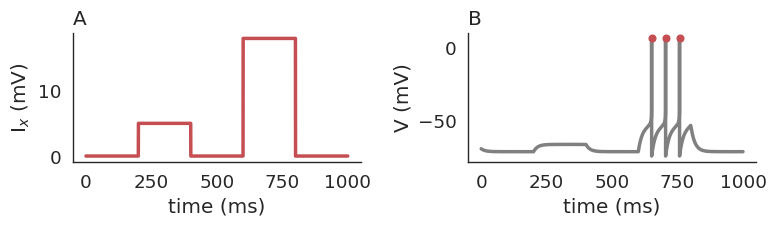

In [137]:
#@title Make figure
plt.subplots(1,2,figsize=(8, 2.5))

plt.subplot(1,2,1)
plt.plot(time,Ix,color='r')
plt.xlabel('time (ms)')
plt.ylabel('I$_x$ (mV)')
plt.title('A',loc='left')
sns.despine()


plt.subplot(1,2,2)
plt.plot(time,V,color='gray')
plt.plot(SpikeTimes,Vth+1+0*SpikeTimes,'ro')
plt.xlabel('time (ms)')
plt.ylabel('V (mV)')
sns.despine()
plt.title('B',loc='left')
plt.tight_layout()


In [109]:
#@title make a video
import cv2 as cv

ss = [int(ele) for ele in np.linspace(0,len(V)-1,1000)]
vl = len(ss)
Vtemp = np.array(V)[ss]
vidOut = cv.VideoWriter('/content/spikeVid_2.avi',cv.VideoWriter_fourcc('M','J','P','G'),75,(len(Vtemp),75))
vidOut2 = cv.VideoWriter('/content/spikeVid_1.avi',cv.VideoWriter_fourcc('M','J','P','G'),75,(640,480))

base = np.zeros((75,vl))

for ind,ele in enumerate(Vtemp):
  base[:,0]=ele-np.nanmin(Vtemp)

  if ind > 0:
    base[:,1:]=b2[:,:len(Vtemp)-1]

  b2 = base.copy()

  bTemp = np.zeros((75,1000,3))
  for ee in range(0,3):
    bTemp[:,:,ee]=base
  vidOut.write(bTemp.astype(np.uint8))

  plt.imshow(base,vmax=35)
  plt.savefig('/content/temp.jpg')
  plt.close()
  img = cv.imread('/content/temp.jpg')
  vidOut2.write(img)
vidOut.release()
vidOut2.release()
